See Section 2 of https://arxiv.org/abs/1203.3503

<img src="2023-02-01.png">

<img src="IMG_8288.PNG" width=80%>

<img src="IMG_8289.PNG" width=80%>

In [1]:
using LinearAlgebra
using Distributions
using StatsPlots
default(fmt=:png, titlefontsize=8, tickfontsize=6, legendfontsize=7, guidefontsize=7)

In [2]:
function rand_XYZU(; c1, c0, c2, δ, ε)
    # Set var(U) = var(Z) = var(X) = 1.
    c3 = √(1 - (c1^2 + δ^2))
    U = randn()
    Z = randn()
    X = c1*U + c3*Z + δ*randn()
    Y = c0*X + c2*U + ε*randn()
    [X, Y, Z, U]
end

function rand_XYZU(n; c1=0.5, c0=1, c2=1, δ=0.2, ε=0.2)
    samples = [rand_XYZU(; c1, c0, c2, δ, ε) for _ in 1:n]
    stack(samples)
end

function calc_all(; c1=0.5, c0=1, c2=1, δ=0.1, ε=0.1, n=10^6)
    @show n
    c3 = √(1 - (c1^2 + δ^2))
    @show c0 c1 c2 c3 δ ε
    println()

    XYZU = rand_XYZU(n; c1, c0, c2, δ, ε)
    X, Y, Z, U = eachrow(XYZU)
    
    @show c0 + c1*c2
    @show a = [X;;] \ Y
    println()
    @show c0 + c1*c2/(1 - c3^2), -c1*c2*c3/(1 - c3^2)
    @show b = [X Z] \ Y
    println()
    @show c0*c1 + c2, c0*c3
    @show c = [U Z] \ Y
    println()
    @show c0, c2
    @show d = [X U] \ Y
    
    nothing
end

calc_all (generic function with 1 method)

<img src="2023-02-01_fig1.png" width="30%">

In [3]:
for c1 in -0.9:0.1:0.9
    calc_all(; c1)
    println("="^80)
end

n = 1000000
c0 = 1
c1 = -0.9
c2 = 1
c3 = 0.42426406871192845
δ = 0.1
ε = 0.1

c0 + c1 * c2 = 0.09999999999999998
a = [X;;] \ Y = [0.10049439943340303]

(c0 + (c1 * c2) / (1 - c3 ^ 2), (-c1 * c2 * c3) / (1 - c3 ^ 2)) = (-0.09756097560975596, 0.4656556851716288)
b = [X Z] \ Y = [-0.09733668614088845, 0.4657193675142269]

(c0 * c1 + c2, c0 * c3) = (0.09999999999999998, 0.42426406871192845)
c = [U Z] \ Y = [0.09975816926596005, 0.4244202775137266]

(c0, c2) = (1, 1)
d = [X U] \ Y = [0.9999997741770937, 0.9998438438022915]
n = 1000000
c0 = 1
c1 = -0.8
c2 = 1
c3 = 0.5916079783099615
δ = 0.1
ε = 0.1

c0 + c1 * c2 = 0.19999999999999996
a = [X;;] \ Y = [0.20000097119270466]

(c0 + (c1 * c2) / (1 - c3 ^ 2), (-c1 * c2 * c3) / (1 - c3 ^ 2)) = (-0.23076923076923062, 0.7281328963814909)
b = [X Z] \ Y = [-0.2306113809523161, 0.7282940314084058]

(c0 * c1 + c2, c0 * c3) = (0.19999999999999996, 0.5916079783099615)
c = [U Z] \ Y = [0.19988437754455013, 0.5918382644794753]

(c0, c2) = (1, 1)
d = [X U] \ 

<img src="2023-02-01_fig1.png" width="30%">

In [4]:
for c1 in -0.9:0.1:0.9
    calc_all(; c1, c2=0.2/c1)
    println("="^80)
end

n = 1000000
c0 = 1
c1 = -0.9
c2 = -0.22222222222222224
c3 = 0.42426406871192845
δ = 0.1
ε = 0.1

c0 + c1 * c2 = 1.2
a = [X;;] \ Y = [1.2001250586816912]

(c0 + (c1 * c2) / (1 - c3 ^ 2), (-c1 * c2 * c3) / (1 - c3 ^ 2)) = (1.2439024390243902, -0.10347904114925084)
b = [X Z] \ Y = [1.2439910592942054, -0.10355238909904008]

(c0 * c1 + c2, c0 * c3) = (-1.1222222222222222, 0.42426406871192845)
c = [U Z] \ Y = [-1.1221737248682813, 0.4240047765494956]

(c0, c2) = (1, -0.22222222222222224)
d = [X U] \ Y = [0.9998387935338713, -0.22242127235922704]
n = 1000000
c0 = 1
c1 = -0.8
c2 = -0.25
c3 = 0.5916079783099615
δ = 0.1
ε = 0.1

c0 + c1 * c2 = 1.2
a = [X;;] \ Y = [1.2001189432242334]

(c0 + (c1 * c2) / (1 - c3 ^ 2), (-c1 * c2 * c3) / (1 - c3 ^ 2)) = (1.3076923076923077, -0.18203322409537273)
b = [X Z] \ Y = [1.3076017891625091, -0.18190675336269985]

(c0 * c1 + c2, c0 * c3) = (-1.05, 0.5916079783099615)
c = [U Z] \ Y = [-1.049990331891212, 0.5917513196718804]

(c0, c2) = (1, -0.25)
d = [X U] \ 

<img src="2023-02-01_fig1.png" width="30%">

In [5]:
for t in range(-π, 0, 20)[begin+1:end-1]
    c1 = cos(t)
    calc_all(; c1, c2=0.2/c1)
    println("="^80)
end

n = 1000000
c0 = 1
c1 = -0.9863613034027223
c2 = -0.2027654565421874
c3 = 0.13073400150566314
δ = 0.1
ε = 0.1

c0 + c1 * c2 = 1.2
a = [X;;] \ Y = [1.2000291534503922]

(c0 + (c1 * c2) / (1 - c3 ^ 2), (-c1 * c2 * c3) / (1 - c3 ^ 2)) = (1.2034777147716738, -0.026601455869328883)
b = [X Z] \ Y = [1.2035334748384117, -0.026681297009177745]

(c0 * c1 + c2, c0 * c3) = (-1.1891267599449098, 0.13073400150566314)
c = [U Z] \ Y = [-1.189026084219686, 0.1305910200465652]

(c0, c2) = (1, -0.2027654565421874)
d = [X U] \ Y = [0.9992475832752962, -0.20354201114387788]
n = 1000000
c0 = 1
c1 = -0.9458172417006346
c2 = -0.2114573420552033
c3 = 0.308917052461989
δ = 0.1
ε = 0.1

c0 + c1 * c2 = 1.2
a = [X;;] \ Y = [1.1998195334615638]

(c0 + (c1 * c2) / (1 - c3 ^ 2), (-c1 * c2 * c3) / (1 - c3 ^ 2)) = (1.221099465697917, -0.06830139524432116)
b = [X Z] \ Y = [1.2209299887449163, -0.06837172917690672]

(c0 * c1 + c2, c0 * c3) = (-1.157274583755838, 0.308917052461989)
c = [U Z] \ Y = [-1.1573004998850014, 0

<img src="2023-02-01_fig1.png" width="30%">

In [6]:
# 誤差の比較

function calc_all(; c1=0.5, c0=1, c2=1, δ=0.2, ε=0.2, n=10^3, L=10^6, bin=200)
    @show L
    @show n
    c3 = √(1 - c1^2)
    @show c0 c1 c2 c3 δ ε
    println()

    XYZU = rand_XYZU(n; c1, c0, c2, δ, ε)
    X, Y, Z, U = eachrow(XYZU)
    
    @show c0 + c1*c2
    @show a = [X;;] \ Y
    println()
    @show c0 + c1*c2/(1 - c3^2), -c1*c2*c3/(1 - c3^2)
    @show b = [X Z] \ Y
    println()
    @show c0*c1 + c2, c0*c3
    @show c = [U Z] \ Y
    println()
    @show c0, c2
    @show d = [X U] \ Y
    
    XYZU_test = rand_XYZU(L; c1, c0, c2, δ, ε)
    error_a = [y - a[1]*x for (x, y, z, u) in eachcol(XYZU_test)]
    error_b = [y - (b[1]*x + b[2]*z) for (x, y, z, u) in eachcol(XYZU_test)]
    error_c = [y - (c[1]*u + c[2]*z) for (x, y, z, u) in eachcol(XYZU_test)]
    error_d = [y - (d[1]*x + d[2]*u) for (x, y, z, u) in eachcol(XYZU_test)]
    
    P1 = plot()
    stephist!(error_a; norm=true, bin, label="Y ~ X", c=1)
    stephist!(error_b; norm=true, bin, label="Y ~ X + Z", ls=:dash, c=2)
    title!("distribution of errors (sample size: n = $n)")
    
    P2 = plot()
    stephist!(error_a; norm=true, bin, label="Y ~ X", c=1)
    stephist!(error_b; norm=true, bin, label="Y ~ X + Z", ls=:dash, c=2)
    stephist!(error_c; norm=true, bin, label="Y ~ U + Z", ls=:dot, c=3)
    stephist!(error_d; norm=true, bin, label="Y ~ X + U", ls=:dashdot, c=4)
    title!("distribution of errors (sample size: n = $n)")
    
    plot(P1, P2; size=(900, 280))
end

calc_all (generic function with 1 method)

<img src="2023-02-01_fig1.png" width="30%">

L = 1000000
n = 1000
c0 = 1
c1 = 0.05
c2 = 4.0
c3 = 0.998749217771909
δ = 0.2
ε = 0.2

c0 + c1 * c2 = 1.2
a = [X;;] \ Y = [1.2397763625684208]

(c0 + (c1 * c2) / (1 - c3 ^ 2), (-c1 * c2 * c3) / (1 - c3 ^ 2)) = (81.0000000000017, -79.89993742175443)
b = [X Z] \ Y = [6.001228331534359, -4.890942631926083]

(c0 * c1 + c2, c0 * c3) = (4.05, 0.998749217771909)
c = [U Z] \ Y = [4.067574051577495, 0.9824613548059117]

(c0, c2) = (1, 4.0)
d = [X U] \ Y = [0.999558171905208, 4.011702967214089]


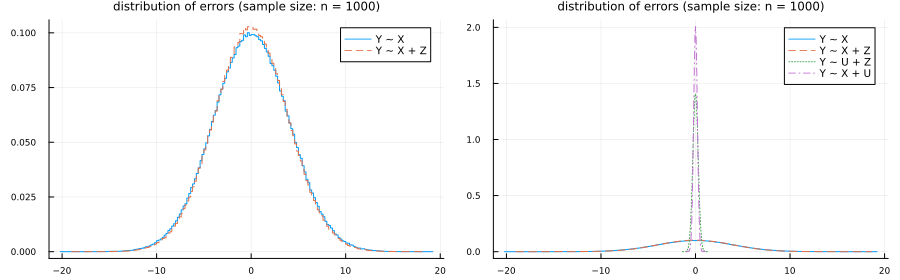

In [7]:
c1 = 0.05
calc_all(; c1, c2=0.2/c1, n=10^3)

L = 1000000
n = 1000
c0 = 1
c1 = 0.1
c2 = 2.0
c3 = 0.99498743710662
δ = 0.2
ε = 0.2

c0 + c1 * c2 = 1.2
a = [X;;] \ Y = [1.2010992751535008]

(c0 + (c1 * c2) / (1 - c3 ^ 2), (-c1 * c2 * c3) / (1 - c3 ^ 2)) = (20.999999999999982, -19.89974874213238)
b = [X Z] \ Y = [5.034216378783649, -3.9293541470570124]

(c0 * c1 + c2, c0 * c3) = (2.1, 0.99498743710662)
c = [U Z] \ Y = [2.0993730526585406, 0.961479788716419]

(c0, c2) = (1, 2.0)
d = [X U] \ Y = [0.9917147575743451, 1.9936570211550264]


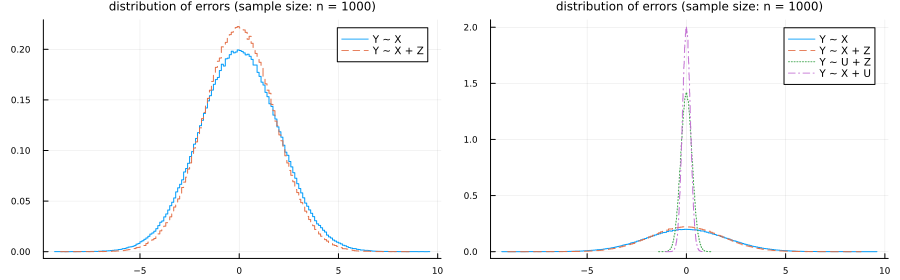

In [8]:
c1 = 0.1
calc_all(; c1, c2=0.2/c1, n=10^3)

L = 1000000
n = 1000
c0 = 1
c1 = 0.2
c2 = 1.0
c3 = 0.9797958971132712
δ = 0.2
ε = 0.2

c0 + c1 * c2 = 1.2
a = [X;;] \ Y = [1.232825442244376]

(c0 + (c1 * c2) / (1 - c3 ^ 2), (-c1 * c2 * c3) / (1 - c3 ^ 2)) = (5.999999999999996, -4.898979485566352)
b = [X Z] \ Y = [3.439896888301396, -2.3082835453341812]

(c0 * c1 + c2, c0 * c3) = (1.2, 0.9797958971132712)
c = [U Z] \ Y = [1.2135084051115008, 0.9604269914539546]

(c0, c2) = (1, 1.0)
d = [X U] \ Y = [1.0052253300302445, 1.0070566132480736]


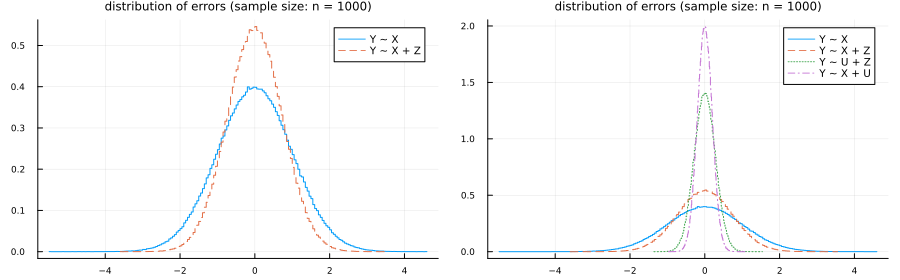

In [17]:
c1 = 0.2
calc_all(; c1, c2=0.2/c1, n=10^3)

L = 1000000
n = 1000
c0 = 1
c1 = 0.3
c2 = 0.6666666666666667
c3 = 0.9539392014169457
δ = 0.2
ε = 0.2

c0 + c1 * c2 = 1.2
a = [X;;] \ Y = [1.2038735268034553]

(c0 + (c1 * c2) / (1 - c3 ^ 2), (-c1 * c2 * c3) / (1 - c3 ^ 2)) = (3.222222222222223, -2.1198648920376577)
b = [X Z] \ Y = [2.5491290214491307, -1.4459724519046517]

(c0 * c1 + c2, c0 * c3) = (0.9666666666666668, 0.9539392014169457)
c = [U Z] \ Y = [0.9813001157031909, 0.9496103930242821]

(c0, c2) = (1, 0.6666666666666667)
d = [X U] \ Y = [1.0116237170156541, 0.6651571413848781]


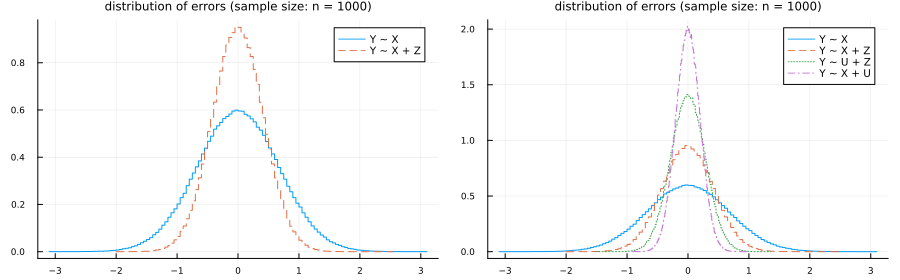

In [9]:
c1 = 0.3
calc_all(; c1, c2=0.2/c1, n=10^3)

L = 1000000
n = 1000
c0 = 1
c1 = 0.4
c2 = 0.5
c3 = 0.916515138991168
δ = 0.2
ε = 0.2

c0 + c1 * c2 = 1.2
a = [X;;] \ Y = [1.2217352573486973]

(c0 + (c1 * c2) / (1 - c3 ^ 2), (-c1 * c2 * c3) / (1 - c3 ^ 2)) = (2.25, -1.1456439237389597)
b = [X Z] \ Y = [2.0016664037985135, -0.8764941918217173]

(c0 * c1 + c2, c0 * c3) = (0.9, 0.916515138991168)
c = [U Z] \ Y = [0.9037760283161165, 0.8879314095858939]

(c0, c2) = (1, 0.5)
d = [X U] \ Y = [1.0048716558072326, 0.5013219790807204]


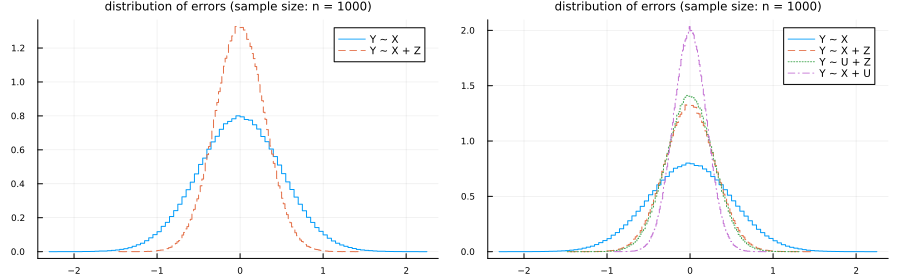

In [16]:
c1 = 0.4
calc_all(; c1, c2=0.2/c1, n=10^3)

<img src="2023-02-01_fig1.png" width="30%">

L = 1000000
n = 1000
c0 = 1
c1 = 0.5
c2 = 0.4
c3 = 0.8660254037844386
δ = 0.2
ε = 0.2

c0 + c1 * c2 = 1.2
a = [X;;] \ Y = [1.2070854646650226]

(c0 + (c1 * c2) / (1 - c3 ^ 2), (-c1 * c2 * c3) / (1 - c3 ^ 2)) = (1.7999999999999998, -0.6928203230275506)
b = [X Z] \ Y = [1.679065926500388, -0.570227129365623]

(c0 * c1 + c2, c0 * c3) = (0.9, 0.8660254037844386)
c = [U Z] \ Y = [0.8931493490428886, 0.8322062337772025]

(c0, c2) = (1, 0.4)
d = [X U] \ Y = [0.9931473796925518, 0.3982145238537019]


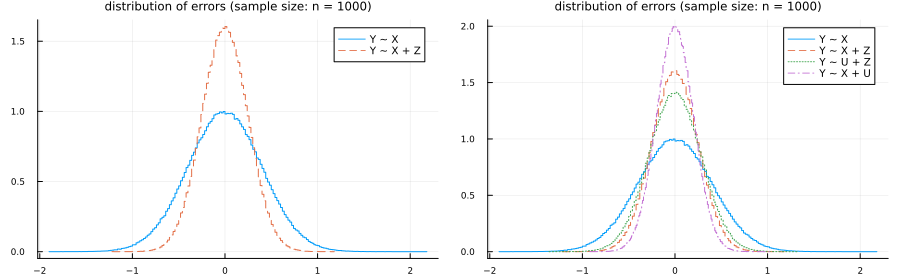

In [10]:
c1 = 0.5
calc_all(; c1, c2=0.2/c1, n=10^3)

L = 1000000
n = 1000
c0 = 1
c1 = 0.6
c2 = 0.33333333333333337
c3 = 0.8
δ = 0.2
ε = 0.2

c0 + c1 * c2 = 1.2
a = [X;;] \ Y = [1.2042314672659855]

(c0 + (c1 * c2) / (1 - c3 ^ 2), (-c1 * c2 * c3) / (1 - c3 ^ 2)) = (1.5555555555555558, -0.4444444444444447)
b = [X Z] \ Y = [1.4875158762482557, -0.3700339426469084]

(c0 * c1 + c2, c0 * c3) = (0.9333333333333333, 0.8)
c = [U Z] \ Y = [0.9260261383047551, 0.7757859459425961]

(c0, c2) = (1, 0.33333333333333337)
d = [X U] \ Y = [1.0089502832943953, 0.3175051075574529]


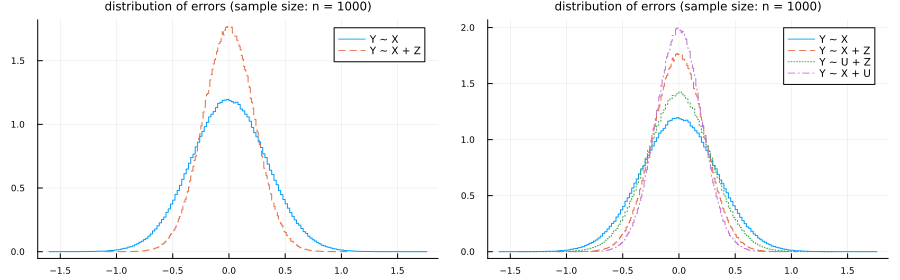

In [15]:
c1 = 0.6
calc_all(; c1, c2=0.2/c1, n=10^3)

L = 1000000
n = 1000
c0 = 1
c1 = 0.7
c2 = 0.28571428571428575
c3 = 0.714142842854285
δ = 0.2
ε = 0.2

c0 + c1 * c2 = 1.2
a = [X;;] \ Y = [1.2053503600718627]

(c0 + (c1 * c2) / (1 - c3 ^ 2), (-c1 * c2 * c3) / (1 - c3 ^ 2)) = (1.4081632653061225, -0.29148687463440204)
b = [X Z] \ Y = [1.3887967247874544, -0.2602468783969775]

(c0 * c1 + c2, c0 * c3) = (0.9857142857142858, 0.714142842854285)
c = [U Z] \ Y = [0.9955607979248831, 0.6993406633772974]

(c0, c2) = (1, 0.28571428571428575)
d = [X U] \ Y = [1.0154730915895251, 0.2818739952894694]


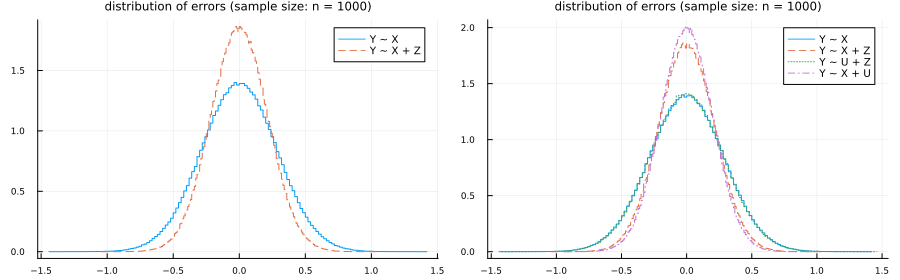

In [11]:
c1 = 0.7
calc_all(; c1, c2=0.2/c1, n=10^3)

L = 1000000
n = 1000
c0 = 1
c1 = 0.8
c2 = 0.25
c3 = 0.5999999999999999
δ = 0.2
ε = 0.2

c0 + c1 * c2 = 1.2
a = [X;;] \ Y = [1.2011659699407204]

(c0 + (c1 * c2) / (1 - c3 ^ 2), (-c1 * c2 * c3) / (1 - c3 ^ 2)) = (1.3125, -0.18749999999999994)
b = [X Z] \ Y = [1.3020281072077042, -0.1699963989438976]

(c0 * c1 + c2, c0 * c3) = (1.05, 0.5999999999999999)
c = [U Z] \ Y = [1.0461551127137811, 0.5603492225345852]

(c0, c2) = (1, 0.25)
d = [X U] \ Y = [1.0017408978692686, 0.25151871499158185]


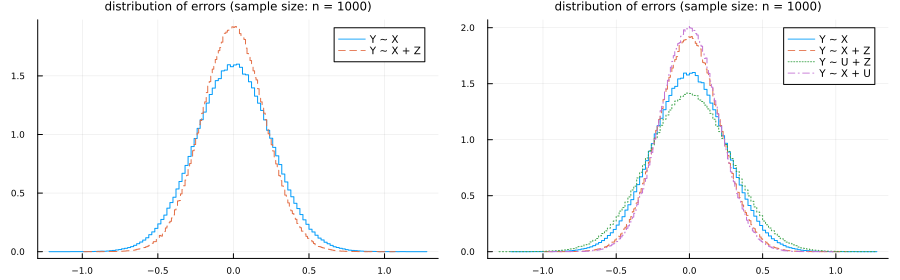

In [14]:
c1 = 0.8
calc_all(; c1, c2=0.2/c1, n=10^3)

L = 1000000
n = 1000
c0 = 1
c1 = 0.9
c2 = 0.22222222222222224
c3 = 0.4358898943540673
δ = 0.2
ε = 0.2

c0 + c1 * c2 = 1.2
a = [X;;] \ Y = [1.1927487271707866]

(c0 + (c1 * c2) / (1 - c3 ^ 2), (-c1 * c2 * c3) / (1 - c3 ^ 2)) = (1.2469135802469136, -0.10762713440841168)
b = [X Z] \ Y = [1.2288148198401563, -0.08968474964609115]

(c0 * c1 + c2, c0 * c3) = (1.1222222222222222, 0.4358898943540673)
c = [U Z] \ Y = [1.1173130040464572, 0.3846365641826275]

(c0, c2) = (1, 0.22222222222222224)
d = [X U] \ Y = [1.00054021661603, 0.21662563253208122]


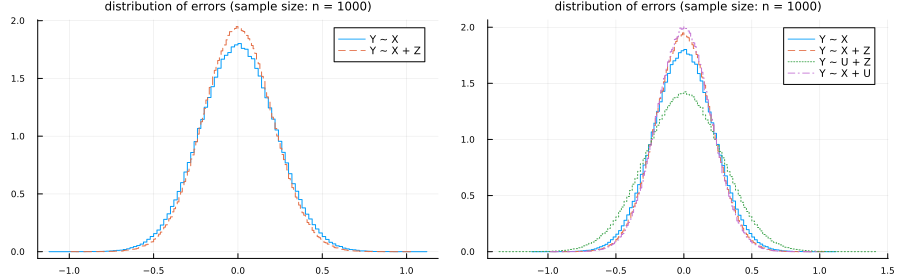

In [12]:
c1 = 0.9
calc_all(; c1, c2=0.2/c1, n=10^3)

L = 1000000
n = 1000
c0 = 1
c1 = 0.95
c2 = 0.2105263157894737
c3 = 0.31224989991991997
δ = 0.2
ε = 0.2

c0 + c1 * c2 = 1.2
a = [X;;] \ Y = [1.2109685840005262]

(c0 + (c1 * c2) / (1 - c3 ^ 2), (-c1 * c2 * c3) / (1 - c3 ^ 2)) = (1.221606648199446, -0.06919665372186593)
b = [X Z] \ Y = [1.2188440346629137, -0.045742809042563906]

(c0 * c1 + c2, c0 * c3) = (1.1605263157894736, 0.31224989991991997)
c = [U Z] \ Y = [1.1729784299177317, 0.2311154992219273]

(c0, c2) = (1, 0.2105263157894737)
d = [X U] \ Y = [1.0338128120150727, 0.1842954230978904]


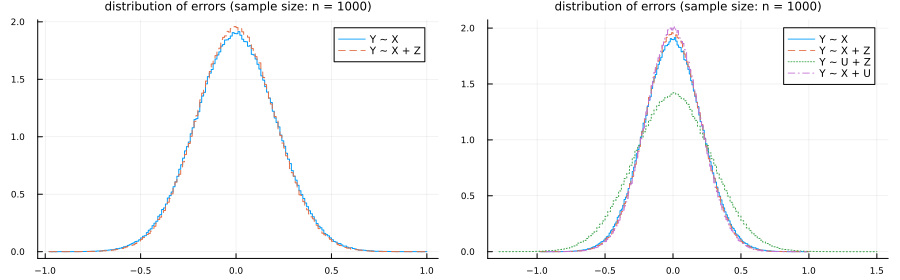

In [13]:
c1 = 0.95
calc_all(; c1, c2=0.2/c1, n=10^3)

<img src="2023-02-01_fig1.png" width="30%">